# About this Notebook

This notebook illustrated and used for traning a DNN model by using FastAI.

**Data**: Peptide seqeunce in numpy array that generated form JAX-Unirep

**ML model**: Tabular learner for Binary Classification (0 AMPs, 1 NonAMPs)

* Baseline Model
* Finetuning the baseline 
* Evaluation 
* Test prediction with test set

------

# Prepare Environment

In [1]:
#hide
!pip install -Uqq fastbook
!pip install pickle5

In [ ]:
# For Google Colab environment.
!cp "/content/drive/My Drive/Colab Notebooks/AMPsNonAMPs_df.plk" .

In [36]:
from sklearn.metrics import classification_report 

from fastai.tabular.all import *
from fastai.basics import *
from fastai import *

import numpy as np
import pandas as pd

# np.set_printoptions(threshold=np.inf)

In [37]:
import pickle5 as pickle
with open( "/home/ubuntu/data/AMPsNonAMPs_df.plk", 'rb') as file:
  AMPs_df = pickle.load(file)

In [38]:
reps_columns =['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'
,'16','17','18','19','20','21','22','23','24','25','26','27','28','29'
,'30','31','32','33','34','35','36','37','38','39','40','41','42','43'
,'44','45','46','47','48','49','50','51','52','53','54','55','56','57'
,'58','59','60','61','62','63','64','65','66','67','68','69','70','71'
,'72','73','74','75','76','77','78','79','80','81','82','83','84','85'
,'86','87','88','89','90','91','92','93','94','95','96','97','98','99'
,'100','101','102','103','104','105','106','107','108','109','110','111'
,'112','113','114','115','116','117','118','119','120','121','122','123'
,'124','125','126','127','128','129','130','131','132','133','134','135'
,'136','137','138','139','140','141','142','143','144','145','146','147'
,'148','149','150','151','152','153','154','155','156','157','158','159'
,'160','161','162','163','164','165','166','167','168','169','170','171'
,'172','173','174','175','176','177','178','179','180','181','182','183'
,'184','185','186','187','188','189','190','191','192','193','194','195'
,'196','197','198','199','200','201','202','203','204','205','206','207'
,'208','209','210','211','212','213','214','215','216','217','218','219'
,'220','221','222','223','224','225','226','227','228','229','230','231'
,'232','233','234','235','236','237','238','239','240','241','242','243'
,'244','245','246','247','248','249','250','251','252','253','254','255'
,'256','257','258','259','260','261','262','263','264','265','266','267'
,'268','269','270','271','272','273','274','275','276','277','278','279'
,'280','281','282','283','284','285','286','287','288','289','290','291'
,'292','293','294','295','296','297','298','299','300','301','302','303'
,'304','305','306','307','308','309','310','311','312','313','314','315'
,'316','317','318','319','320','321','322','323','324','325','326','327'
,'328','329','330','331','332','333','334','335','336','337','338','339'
,'340','341','342','343','344','345','346','347','348','349','350','351'
,'352','353','354','355','356','357','358','359','360','361','362','363'
,'364','365','366','367','368','369','370','371','372','373','374','375'
,'376','377','378','379','380','381','382','383','384','385','386','387'
,'388','389','390','391','392','393','394','395','396','397','398','399'
,'400','401','402','403','404','405','406','407','408','409','410','411'
,'412','413','414','415','416','417','418','419','420','421','422','423'
,'424','425','426','427','428','429','430','431','432','433','434','435'
,'436','437','438','439','440','441','442','443','444','445','446','447'
,'448','449','450','451','452','453','454','455','456','457','458','459'
,'460','461','462','463','464','465','466','467','468','469','470','471'
,'472','473','474','475','476','477','478','479','480','481','482','483'
,'484','485','486','487','488','489','490','491','492','493','494','495'
,'496','497','498','499','500','501','502','503','504','505','506','507'
,'508','509','510','511','512','513','514','515','516','517','518','519'
,'520','521','522','523','524','525','526','527','528','529','530','531'
,'532','533','534','535','536','537','538','539','540','541','542','543'
,'544','545','546','547','548','549','550','551','552','553','554','555'
,'556','557','558','559','560','561','562','563','564','565','566','567'
,'568','569','570','571','572','573','574','575','576','577','578','579'
,'580','581','582','583','584','585','586','587','588','589','590','591'
,'592','593','594','595','596','597','598','599','600','601','602','603'
,'604','605','606','607','608','609','610','611','612','613','614','615'
,'616','617','618','619','620','621','622','623','624','625','626','627'
,'628','629','630','631','632','633','634','635','636','637','638','639'
,'640','641','642','643','644','645','646','647','648','649','650','651'
,'652','653','654','655','656','657','658','659','660','661','662','663'
,'664','665','666','667','668','669','670','671','672','673','674','675'
,'676','677','678','679','680','681','682','683','684','685','686','687'
,'688','689','690','691','692','693','694','695','696','697','698','699'
,'700','701','702','703','704','705','706','707','708','709','710','711'
,'712','713','714','715','716','717','718','719','720','721','722','723'
,'724','725','726','727','728','729','730','731','732','733','734','735'
,'736','737','738','739','740','741','742','743','744','745','746','747'
,'748','749','750','751','752','753','754','755','756','757','758','759'
,'760','761','762','763','764','765','766','767','768','769','770','771'
,'772','773','774','775','776','777','778','779','780','781','782','783'
,'784','785','786','787','788','789','790','791','792','793','794','795'
,'796','797','798','799','800','801','802','803','804','805','806','807'
,'808','809','810','811','812','813','814','815','816','817','818','819'
,'820','821','822','823','824','825','826','827','828','829','830','831'
,'832','833','834','835','836','837','838','839','840','841','842','843'
,'844','845','846','847','848','849','850','851','852','853','854','855'
,'856','857','858','859','860','861','862','863','864','865','866','867'
,'868','869','870','871','872','873','874','875','876','877','878','879'
,'880','881','882','883','884','885','886','887','888','889','890','891'
,'892','893','894','895','896','897','898','899','900','901','902','903'
,'904','905','906','907','908','909','910','911','912','913','914','915'
,'916','917','918','919','920','921','922','923','924','925','926','927'
,'928','929','930','931','932','933','934','935','936','937','938','939'
,'940','941','942','943','944','945','946','947','948','949','950','951'
,'952','953','954','955','956','957','958','959','960','961','962','963'
,'964','965','966','967','968','969','970','971','972','973','974','975'
,'976','977','978','979','980','981','982','983','984','985','986','987'
,'988','989','990','991','992','993','994','995','996','997','998','999'
,'1000','1001','1002','1003','1004','1005','1006','1007','1008','1009'
,'1010','1011','1012','1013','1014','1015','1016','1017','1018','1019'
,'1020','1021','1022','1023','1024','1025','1026','1027','1028','1029'
,'1030','1031','1032','1033','1034','1035','1036','1037','1038','1039'
,'1040','1041','1042','1043','1044','1045','1046','1047','1048','1049'
,'1050','1051','1052','1053','1054','1055','1056','1057','1058','1059'
,'1060','1061','1062','1063','1064','1065','1066','1067','1068','1069'
,'1070','1071','1072','1073','1074','1075','1076','1077','1078','1079'
,'1080','1081','1082','1083','1084','1085','1086','1087','1088','1089'
,'1090','1091','1092','1093','1094','1095','1096','1097','1098','1099'
,'1100','1101','1102','1103','1104','1105','1106','1107','1108','1109'
,'1110','1111','1112','1113','1114','1115','1116','1117','1118','1119'
,'1120','1121','1122','1123','1124','1125','1126','1127','1128','1129'
,'1130','1131','1132','1133','1134','1135','1136','1137','1138','1139'
,'1140','1141','1142','1143','1144','1145','1146','1147','1148','1149'
,'1150','1151','1152','1153','1154','1155','1156','1157','1158','1159'
,'1160','1161','1162','1163','1164','1165','1166','1167','1168','1169'
,'1170','1171','1172','1173','1174','1175','1176','1177','1178','1179'
,'1180','1181','1182','1183','1184','1185','1186','1187','1188','1189'
,'1190','1191','1192','1193','1194','1195','1196','1197','1198','1199'
,'1200','1201','1202','1203','1204','1205','1206','1207','1208','1209'
,'1210','1211','1212','1213','1214','1215','1216','1217','1218','1219'
,'1220','1221','1222','1223','1224','1225','1226','1227','1228','1229'
,'1230','1231','1232','1233','1234','1235','1236','1237','1238','1239'
,'1240','1241','1242','1243','1244','1245','1246','1247','1248','1249'
,'1250','1251','1252','1253','1254','1255','1256','1257','1258','1259'
,'1260','1261','1262','1263','1264','1265','1266','1267','1268','1269'
,'1270','1271','1272','1273','1274','1275','1276','1277','1278','1279'
,'1280','1281','1282','1283','1284','1285','1286','1287','1288','1289'
,'1290','1291','1292','1293','1294','1295','1296','1297','1298','1299'
,'1300','1301','1302','1303','1304','1305','1306','1307','1308','1309'
,'1310','1311','1312','1313','1314','1315','1316','1317','1318','1319'
,'1320','1321','1322','1323','1324','1325','1326','1327','1328','1329'
,'1330','1331','1332','1333','1334','1335','1336','1337','1338','1339'
,'1340','1341','1342','1343','1344','1345','1346','1347','1348','1349'
,'1350','1351','1352','1353','1354','1355','1356','1357','1358','1359'
,'1360','1361','1362','1363','1364','1365','1366','1367','1368','1369'
,'1370','1371','1372','1373','1374','1375','1376','1377','1378','1379'
,'1380','1381','1382','1383','1384','1385','1386','1387','1388','1389'
,'1390','1391','1392','1393','1394','1395','1396','1397','1398','1399'
,'1400','1401','1402','1403','1404','1405','1406','1407','1408','1409'
,'1410','1411','1412','1413','1414','1415','1416','1417','1418','1419'
,'1420','1421','1422','1423','1424','1425','1426','1427','1428','1429'
,'1430','1431','1432','1433','1434','1435','1436','1437','1438','1439'
,'1440','1441','1442','1443','1444','1445','1446','1447','1448','1449'
,'1450','1451','1452','1453','1454','1455','1456','1457','1458','1459'
,'1460','1461','1462','1463','1464','1465','1466','1467','1468','1469'
,'1470','1471','1472','1473','1474','1475','1476','1477','1478','1479'
,'1480','1481','1482','1483','1484','1485','1486','1487','1488','1489'
,'1490','1491','1492','1493','1494','1495','1496','1497','1498','1499'
,'1500','1501','1502','1503','1504','1505','1506','1507','1508','1509'
,'1510','1511','1512','1513','1514','1515','1516','1517','1518','1519'
,'1520','1521','1522','1523','1524','1525','1526','1527','1528','1529'
,'1530','1531','1532','1533','1534','1535','1536','1537','1538','1539'
,'1540','1541','1542','1543','1544','1545','1546','1547','1548','1549'
,'1550','1551','1552','1553','1554','1555','1556','1557','1558','1559'
,'1560','1561','1562','1563','1564','1565','1566','1567','1568','1569'
,'1570','1571','1572','1573','1574','1575','1576','1577','1578','1579'
,'1580','1581','1582','1583','1584','1585','1586','1587','1588','1589'
,'1590','1591','1592','1593','1594','1595','1596','1597','1598','1599'
,'1600','1601','1602','1603','1604','1605','1606','1607','1608','1609'
,'1610','1611','1612','1613','1614','1615','1616','1617','1618','1619'
,'1620','1621','1622','1623','1624','1625','1626','1627','1628','1629'
,'1630','1631','1632','1633','1634','1635','1636','1637','1638','1639'
,'1640','1641','1642','1643','1644','1645','1646','1647','1648','1649'
,'1650','1651','1652','1653','1654','1655','1656','1657','1658','1659'
,'1660','1661','1662','1663','1664','1665','1666','1667','1668','1669'
,'1670','1671','1672','1673','1674','1675','1676','1677','1678','1679'
,'1680','1681','1682','1683','1684','1685','1686','1687','1688','1689'
,'1690','1691','1692','1693','1694','1695','1696','1697','1698','1699'
,'1700','1701','1702','1703','1704','1705','1706','1707','1708','1709'
,'1710','1711','1712','1713','1714','1715','1716','1717','1718','1719'
,'1720','1721','1722','1723','1724','1725','1726','1727','1728','1729'
,'1730','1731','1732','1733','1734','1735','1736','1737','1738','1739'
,'1740','1741','1742','1743','1744','1745','1746','1747','1748','1749'
,'1750','1751','1752','1753','1754','1755','1756','1757','1758','1759'
,'1760','1761','1762','1763','1764','1765','1766','1767','1768','1769'
,'1770','1771','1772','1773','1774','1775','1776','1777','1778','1779'
,'1780','1781','1782','1783','1784','1785','1786','1787','1788','1789'
,'1790','1791','1792','1793','1794','1795','1796','1797','1798','1799'
,'1800','1801','1802','1803','1804','1805','1806','1807','1808','1809'
,'1810','1811','1812','1813','1814','1815','1816','1817','1818','1819'
,'1820','1821','1822','1823','1824','1825','1826','1827','1828','1829'
,'1830','1831','1832','1833','1834','1835','1836','1837','1838','1839'
,'1840','1841','1842','1843','1844','1845','1846','1847','1848','1849'
,'1850','1851','1852','1853','1854','1855','1856','1857','1858','1859'
,'1860','1861','1862','1863','1864','1865','1866','1867','1868','1869'
,'1870','1871','1872','1873','1874','1875','1876','1877','1878','1879'
,'1880','1881','1882','1883','1884','1885','1886','1887','1888','1889'
,'1890','1891','1892','1893','1894','1895','1896','1897','1898','1899']

# FastAI - Tabular learner

What is Tabular Learner?

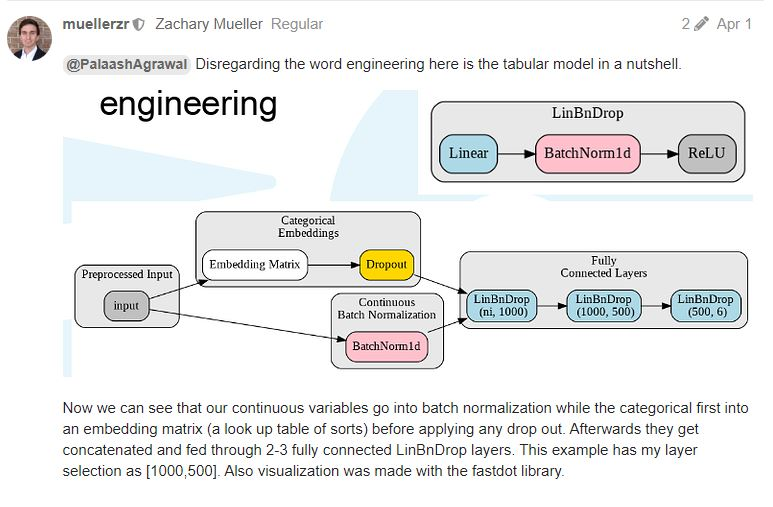

## Prepare Data, Split Training, Validation, and Test set

Deduplicate row 

In [4]:
AMPs_df.drop_duplicates(subset=['Sequence'],inplace=True)
AMPs_df

,ID,Sequence,length,class,reps
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESPKQGPLGQFYTGLKDSLSDRFKTKDIVRNFLRSAAPDGISNVMGFADEAMAVTRDIKESLERTNAADLQYIAKKAQQILPQVKDYVSEDTYNNISEGLENKIDEYDYTIQSGRDQTAIRRARQEESDSNQIKAAMDNIALTERLNHNKSEQAANARHNQSRAENSIRDVLTTKRFDFMAKSMGMAVDSLQRLAGYNEQVDYGFQRKGLELQFRSYLGIKELVKLSEAHLELNARAYNSIVRNTALADHQKTNRKDLGQIGNGQSNSRGFASNAARAIGGKTLSQFYGNYSGNVQSRVTDSLSQKLGMAVQAIKMGEAGPNLWDNKYSFAGGIAGDFLSDFLLNDLVPMMGREARSPLTKLSNKYGGRHNQAGYLMDNMPAFMQEFVNNNQNQHGWKGSIRNLIAPYVPQFGLQDRLQNGTFQTIDQHAAFNQATQRSIVDAIPGYLARILQEMRMIRTGSDQVAREVFDMTTGKFGVEANMHDNIQNRILPENAVRSASATINDALNQIDKDGKLSAGARKALGERLLRDSSSNQRFDPEAYIRTRGYAQG...,2337,0,"[0.0032203220762312412, 0.07328620553016663, 0.03960951417684555, -0.08139611780643463, -0.09766422212123871, -0.009298615157604218, 0.14109456539154053, -0.014705468900501728, -0.0023602822329849005, 0.017337778583168983, -0.07331045717000961, -0.00021124011254869401, 0.0193979199975729, -0.4777616262435913, 0.003328051185235381, 0.00010637283412506804, 0.016471300274133682, -0.01661418378353119, 0.321921706199646, -0.0038946345448493958, -0.01604468934237957, 0.08834319561719894, 0.16474846005439758, -0.0855826810002327, 0.04877813905477524, -0.13036441802978516, -0.29385948181152344, 0...."
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYTDFKSGLKSGFLDKFKTTTVLKNFLRHAAPDGFNRLFGVYDDLVTSAKDIKDSVERTNAADLDYLGRKAKSYLPYLEKHIPNTLYKSMDEGLSRKLEQYNYEMEAGRDQIAIRKRAQQAADENEIKAALDQNTLVSKENFQRSEQGIIKRAAMEKAERNIRDKISAGRFDFTSRAMSMAVDSLTRISAYHEQVSYGMQRKSLELQFRSYLGIRDLVRLTEANMELQDRAFQALVRNTGIPEHKKAGMGSGLLGFGDGRGNASFAKALAGAAFSTLPGFMGNWGGQVEDRVKKSLSGRLADIVSAARMGEGAGSFWDQRYNLAGMMAGEFGSDVINDHIAPWLGSKLRPGATRLAQRFGGRHNQLNYTLDNIPAFLQEFVNNSQNQYGWKGTVRDMIAPFIPQFSLKDRLDNGTYQTIDQQTAFNQLTQRSITEVIPGLLSRAVQELRMIRTGRNDVEREVFDITTGKFTVEKTAQDNVMHRVIPKTAIRNTSGMINDALNNLDQEGQLSPAARKALSERLLRDASTNRRFDPNAYIRAGGYADGLSPDVTN...,2319,0,"[0.0027930964715778828, 0.06916013360023499, 0.03443620726466179, -0.07424003630876541, -0.0917772725224495, -0.012301675044000149, 0.12955398857593536, -0.013877473771572113, -0.0023703353945165873, 0.006205959711223841, -0.06716899573802948, 0.0001878739130916074, 0.019688822329044342, -0.469400018453598, 0.0041504185646772385, 0.0002477981033734977, 0.01527024433016777, -0.015405036509037018, 0.3043926954269409, -0.0036805663257837296, -0.01732759177684784, 0.08475076407194138, 0.15827859938144684, -0.08625970035791397, 0.04462776705622673, -0.10623129457235336, -0.2580254077911377, 0.0..."
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSPVTEFFNGIKQGLFDSVKPQQALKAFMRSAAPDGFSRMFGVYEDTMSTIRDVKDSVERTSASDLLFLTREAQDLAVKLKDKVPASVFDRLNNRLESQIENYKYAEDSNRNYKEIRRRMEAERDEDELKSAIDQVTLVQRDLAIKAEQGEVKRFAIGQAERGIRDKVSADRFDWMAKAMGQTVDNLSKLASYNEQVNYSIQKKGLEIQFRSMLHLRKIAQQTEATMELLNNGFAALVRNTGIPDHKKSSMKDLVGFNAAQRVSSSFVDNAIQTLPNFLGNFGSAVTNNATRFANENIRNFADAVRAGNMFGADAWENRYNIAGQFAGSYLGDWTRNSVIPVLGRMARPGIERFSNNYLGGRHNQASYLLDNFPAWTQEYMNNYQNTYGARGILRDIMAPFIPQFTLQDRLKTGSYQTIGQDSGFNQLTQRTIVEAIPGYLSRLLQETRMIRTGRDDITREVFDLSTGSFMSVEDSAANTERRLVSRSTVRGVSGALTDVLEAFDPNKELSIDARKALTERLIRDANMNKRFDPEAYARAGGYDRSKVSGETI...,2237,0,"[0.0023172732908278704, 0.05406315624713898, 0.02964319847524166, -0.07771465927362442, -0.10238225758075714, -0.018419215455651283, 0.130293071269989, -0.010732676833868027, -0.0019274279475212097, 0.007403213530778885, -0.06499642133712769, -0.00030835828511044383, 0.021760769188404083, -0.42374497652053833, 0.0027333146426826715, -8.552138751838356e-05, 0.01861155591905117, -0.012911551631987095, 0.38518404960632324, -0.0023920575622469187, -0.015890873968601227, 0.075282022356987, 0.16991588473320007, -0.12142758816480637, 0.03364425152540207, -0.13567346334457397, -0.34430333971977234..."
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEYTEKSTQSYKRRLEELGSAVKVATKNVEALENEYHTVAEAQGHNSKQAQALRAEYNRQATELKFLQDSLNDTTQDYKEFTKAQQIANSGWTKAGNGMTSISKGLDSVSNKLSSTGQSLTNSITKPALIAGGALAGMTAKL

Create index for Spliting  training, validation, and test set

In [5]:
f = TrainTestSplitter(test_size=0.2, random_state=42)
train_splits,test_splits = f(AMPs_df)

In [6]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_splits))
splits

((#26848) [11812,10260,30597,8941,31855,32172,14210,30199,15966,18761...],
 (#6712) [7857,7152,6202,10016,26790,21566,14818,15197,6922,6996...])

Transform from list of array into separate columns

In [7]:
df =AMPs_df[["reps","class"]]
df

,reps,class
0,"[0.0032203220762312412, 0.07328620553016663, 0.03960951417684555, -0.08139611780643463, -0.09766422212123871, -0.009298615157604218, 0.14109456539154053, -0.014705468900501728, -0.0023602822329849005, 0.017337778583168983, -0.07331045717000961, -0.00021124011254869401, 0.0193979199975729, -0.4777616262435913, 0.003328051185235381, 0.00010637283412506804, 0.016471300274133682, -0.01661418378353119, 0.321921706199646, -0.0038946345448493958, -0.01604468934237957, 0.08834319561719894, 0.16474846005439758, -0.0855826810002327, 0.04877813905477524, -0.13036441802978516, -0.29385948181152344, 0....",0
1,"[0.0027930964715778828, 0.06916013360023499, 0.03443620726466179, -0.07424003630876541, -0.0917772725224495, -0.012301675044000149, 0.12955398857593536, -0.013877473771572113, -0.0023703353945165873, 0.006205959711223841, -0.06716899573802948, 0.0001878739130916074, 0.019688822329044342, -0.469400018453598, 0.0041504185646772385, 0.0002477981033734977, 0.01527024433016777, -0.015405036509037018, 0.3043926954269409, -0.0036805663257837296, -0.01732759177684784, 0.08475076407194138, 0.15827859938144684, -0.08625970035791397, 0.04462776705622673, -0.10623129457235336, -0.2580254077911377, 0.0...",0
2,"[0.0023172732908278704, 0.05406315624713898, 0.02964319847524166, -0.07771465927362442, -0.10238225758075714, -0.018419215455651283, 0.130293071269989, -0.010732676833868027, -0.0019274279475212097, 0.007403213530778885, -0.06499642133712769, -0.00030835828511044383, 0.021760769188404083, -0.42374497652053833, 0.0027333146426826715, -8.552138751838356e-05, 0.01861155591905117, -0.012911551631987095, 0.38518404960632324, -0.0023920575622469187, -0.015890873968601227, 0.075282022356987, 0.16991588473320007, -0.12142758816480637, 0.03364425152540207, -0.13567346334457397, -0.34430333971977234...",0
3,"[0.014644640497863293, 0.07187927514314651, 0.03476336970925331, -0.062473781406879425, -0.20857325196266174, -0.07085269689559937, 0.09809263050556183, -0.029979974031448364, -0.001456119236536324, 0.05369142070412636, -0.05863136798143387, -0.011041693389415741, 0.061043694615364075, -0.5108106732368469, 0.008037503808736801, -0.0021253181621432304, 0.01335835736244917, -0.029951056465506554, 0.145701602101326, -0.029332101345062256, -0.14064976572990417, 0.11573339998722076, 0.07744225114583969, -0.056989721953868866, 0.015888020396232605, -0.06470438838005066, 0.024571897462010384, 0.0...",0
4,"[0.0062357354909181595, 0.01848522014915943, 0.04270647466182709, -0.03750788792967796, -0.25311335921287537, -0.00685717910528183, -0.14519086480140686, -0.010646650567650795, -0.0018817447125911713, 0.06444142758846283, -0.04575810581445694, -0.006904687266796827, 0.07956559211015701, 0.006459108553826809, 0.0010128344874829054, -0.0007836762233637273, 0.03181959316134453, -0.015786506235599518, 0.1635882407426834, -0.018675778061151505, -0.020661689341068268, 0.037735067307949066, 0.10258500277996063, -0.18946202099323273, 0.0004847639356739819, -0.15857382118701935, -0.1400321573019027...",0
...,...,...
42439,"[0.04739842936396599, 0.01943567767739296, -0.03984174504876137, 0.050581518560647964, 0.03177352994680405, 0.06858610361814499, -0.21905551850795746, -0.20272395014762878, -0.05561608076095581, 0.2501901388168335, -0.48699280619621277, 0.041441503912210464, 0.059951700270175934, 0.059437572956085205, 0.04661417007446289, 0.042263131588697433, 0.0393640473484993, 0.07692562788724899, 0.07753928750753403, -0.042549338191747665, 0.04149150103330612, 0.05937035381793976, 0.342242032289505, 0.04937750846147537, 0.07114406675100327, 0.14997361600399017, 0.14111186563968658, 0.04903069883584976,...",1
42440,"[0.0483490452170372, -0.007824046537280083, -0.03327228128910065, 0.05100439488887787, 0.013358911499381065, 0.054971273988485336, -0.5094548463821411, 0.032711420208215714, -0.05609971657395363, 0.22537510097026825, 0.41689565777778625, 0.03919267654418945, 0.07009176164865494, 0.09205436706542969, 0.04685972258448601, 0.03866

In [8]:
 #df['reps'].apply(tuple).value_counts()
 df_new = df.reps.apply(pd.Series).astype(np.float64)
 df_new['class'] = df['class']
 df_new

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,class
0,0.003220,0.073286,0.039610,-0.081396,-0.097664,-0.009299,0.141095,-0.014705,-0.002360,0.017338,...,0.038974,-0.041898,0.014611,-0.140464,-0.159461,0.172770,0.038176,0.001045,0.130533,0
1,0.002793,0.069160,0.034436,-0.074240,-0.091777,-0.012302,0.129554,-0.013877,-0.002370,0.006206,...,0.032007,-0.053930,0.010304,-0.146390,-0.160165,0.184182,0.034579,-0.002108,0.113139,0
2,0.002317,0.054063,0.029643,-0.077715,-0.102382,-0.018419,0.130293,-0.010733,-0.001927,0.007403,...,0.032786,-0.045271,0.024262,-0.131867,-0.132735,0.214412,0.028494,-0.030600,0.124883,0
3,0.014645,0.071879,0.034763,-0.062474,-0.208573,-0.070853,0.098093,-0.029980,-0.001456,0.053691,...,0.001647,-0.011020,-0.015470,-0.157489,-0.096212,0.107507,0.021454,0.144605,0.038405,0
4,0.006236,0.018485,0.042706,-0.037508,-0.253113,-0.006857,-0.145191,-0.010647,-0.001882,0.064441,...,0.042877,-0.034219,0.020791,-0.033644,-0.042421,0.006428,0.064086,0.299079,0.020408,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,0.047398,0.019436,-0.039842,0.050582,0.031774,0.068586,-0.219056,-0.202724,-0.055616,0.250190,...,0.069892,-0.027141,0.051759,0.039957,0.024313,0.275040,0.092340,0.051801,0.044719,1
42440,0.048349,-0.007824,-0.033272,0.051004,0.013359,0.054971,-0.509455,0.032711,-0.056100,0.225375,...,0.104017,-0.082060,0.045554,0.038322,0.016898,0.088050,0.076477,0.074435,0.124462,1
42441,0.047338,-0.013988,-0.038846,0.051135,0.025912,0.071711,-0.449391,0.031075,-0.055574,0.407604,...,0.156391,-0.055767,0.058176,0.037907,0.035981,0.115794,0.084910,0.052877,0.029546,1
42442,0.046977,-0.027571,-0.030715,0.050779,-0.116802,0.074466,-0.375273,0.040132,-0.056104,0.356369,...,0.086769,-0.134194,0.059559,0.012348,0.013011,0.087329,0.049971,0.085940,0.047609,1


Pandas is rendering the column with 6 decimal places, it's storing it correctly

In [ ]:
df_new[0][0]

0.0032203220762312412

Convert column type to string 

In [9]:
df_new.columns = df_new.columns.astype(str)
df_new.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899',
       'class'],
      dtype='object', length=1901)

Feed data frame to TabularPandas function to  preprocess tabular data before assembling it in a DataLoader

In [10]:
to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)

In [ ]:
to

Building our DataLoader

In [11]:
dls = to.dataloaders()
dls.show_batch()

Split data into test set

In [12]:
X_test = df_new.iloc[test_splits,:-1]
y_test = df_new.iloc[test_splits,-1]


In [13]:
train = df_new.iloc[train_splits]
X_train=df_new.iloc[train_splits,:-1]
y_train = df_new.iloc[test_splits,-1]
train

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,class
6272,0.014980,-0.006026,-0.006059,-0.007202,-0.172389,0.025834,-0.157338,-0.043862,-0.015008,0.093613,...,0.008477,-0.063899,0.026807,-0.097710,-0.180579,0.282985,0.034062,0.120015,0.016602,0
15888,0.052738,-0.059538,0.034404,-0.005374,-0.014578,0.025207,-0.074395,0.035148,-0.089032,0.154165,...,0.076583,-0.091900,0.077862,-0.015979,-0.045568,0.162867,0.095945,0.106901,0.149749,0
27831,0.008926,0.013229,0.009202,0.000333,-0.043154,0.045038,-0.487599,-0.009481,-0.011429,0.183346,...,0.179148,-0.134997,0.028864,-0.088118,0.084606,0.128368,0.076470,0.143646,0.018000,1
6000,0.016066,-0.032132,-0.002863,0.011006,-0.014060,0.020346,-0.459168,-0.021285,-0.015432,0.105097,...,0.088582,-0.124247,0.025134,-0.024976,-0.012529,0.041231,-0.000110,0.137151,0.027904,0
181,0.002114,0.050694,0.066392,-0.020975,0.063595,0.037839,-0.064706,-0.011810,-0.002931,0.055241,...,0.158162,-0.167564,0.037054,-0.116931,0.044769,0.092405,0.026818,-0.005528,0.084227,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.012043,-0.011088,0.027486,0.000470,-0.205767,0.133474,-0.227815,-0.011875,-0.015767,0.108321,...,0.065174,-0.207593,0.041548,-0.112916,0.012958,0.247381,0.055020,0.161720,0.017703,0
11284,0.024368,-0.014909,-0.008516,0.023274,-0.074268,0.036836,-0.348752,-0.022101,-0.028138,0.081744,...,0.058122,-0.180325,0.026358,-0.021615,-0.016593,0.153849,0.059118,0.057093,0.022097,0
38498,0.040661,-0.075660,-0.022677,0.041350,-0.039299,0.045055,-0.322260,0.030362,-0.046727,0.122274,...,0.098132,-0.089334,0.052942,0.031396,0.025630,0.031623,0.055583,0.103009,0.073563,1
860,0.003797,0.114935,0.056901,-0.007861,-0.235860,0.052184,-0.175975,0.035367,-0.004503,0.041767,...,0.071924,-0.133868,0.074362,-0.078795,0.049839,-0.046514,0.046748,0.052531,0.018299,0


## Baseline Model

In [44]:
learn = tabular_learner(dls, metrics=[accuracy, error_rate])

In [22]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(1900, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=1900, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [23]:
learn.summary()

TabularModel (Input shape: ['64 x 0', '64 x 1900'])
Layer (type)         Output Shape         Param #    Trainable 
BatchNorm1d          64 x 1900            3,800      True      
________________________________________________________________
BatchNorm1d          64 x 1900            3,800      True      
________________________________________________________________
Linear               64 x 200             380,000    True      
________________________________________________________________
ReLU                 64 x 100             0          False     
________________________________________________________________
BatchNorm1d          64 x 200             400        True      
________________________________________________________________
Linear               64 x 100             20,000     True      
________________________________________________________________
ReLU                 64 x 100             0          False     
______________________________________________

Which learning rate should I pick to train a model?
* https://forums.fast.ai/t/lesson-6-official-topic/69306/362

**The idea is to get  a low loss and has the highest learning rate before shooting up**

SuggestedLRs(lr_min=0.004786301031708717, lr_steep=0.007585775572806597)

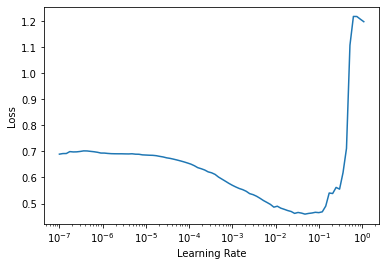

In [17]:
learn.lr_find()

In [33]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.108351,0.186311,0.934297,0.065703,00:08
1,0.136509,0.174726,0.933850,0.066150,00:08
2,0.098629,0.168782,0.936830,0.063170,00:08
3,0.067658,0.173660,0.941746,0.058254,00:08
4,0.049003,0.178401,0.942193,0.057807,00:08


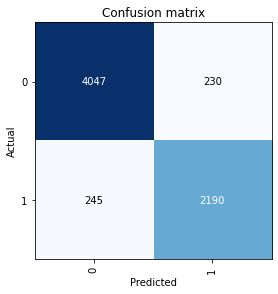

In [23]:
# predict the validation set with our model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

In [24]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9292312264442444 %.


In [25]:
y_hat = np.argmax(preds,axis=1)
y_hat

tensor([0, 0, 0,  ..., 0, 1, 0])

In [26]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4277
           1       0.90      0.90      0.90      2435

    accuracy                           0.93      6712
   macro avg       0.92      0.92      0.92      6712
weighted avg       0.93      0.93      0.93      6712



In [27]:
preds,y_true,y_hat=learn.get_preds( with_decoded=True)

In [28]:
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4277
           1       0.90      0.90      0.90      2435

    accuracy                           0.93      6712
   macro avg       0.92      0.92      0.92      6712
weighted avg       0.93      0.93      0.93      6712



In [ ]:
# Save the model at this stage
learn.save('TubularLearner.fastAI._stage1')

Path('models/TubularLearner.fastAI._stage1.pth')

## Finetuning the baseline

This section is under experiment (Not sure the way of using function is correctly)

In [ ]:
# load the baseline model
learn.load('TubularLearner.fastAI._stage1')

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=7.585775847473997e-07)

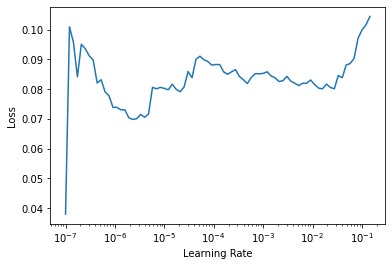

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
#learn.fine_tune(5)

In [ ]:
#3.311311274956097e-06
learn.fine_tune(10, 1e-07)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.077367,0.187189,0.935787,0.064213,00:21


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.073835,0.187308,0.934744,0.065256,00:20
1,0.081734,0.185366,0.934595,0.065405,00:20
2,0.080238,0.187802,0.934595,0.065405,00:20
3,0.074791,0.186595,0.936532,0.063468,00:20
4,0.079004,0.184306,0.933552,0.066448,00:20
5,0.077866,0.186525,0.935936,0.064064,00:20
6,0.085229,0.188269,0.936234,0.063766,00:20
7,0.077495,0.182676,0.934148,0.065852,00:20
8,0.074458,0.187072,0.936681,0.063319,00:20
9,0.080331,0.186359,0.934893,0.065107,00:20


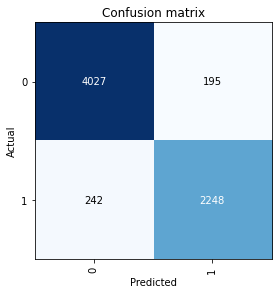

In [ ]:
# predict the validation set with our model
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

In [ ]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.9348927140235901 %.


In [ ]:
learn.show_results()

## Evaluation 

In [29]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.979555465723494


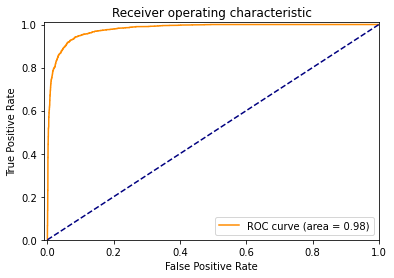

In [30]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Predict with Test set

* https://forums.fast.ai/t/getting-predictions-get-preds-for-test-sets/32077
* https://forums.fast.ai/t/different-results-for-get-preds-and-predict/37938/14

In [34]:
dl = learn.dls.test_dl(X_test)
_preds,_none ,_y =learn.get_preds(dl=dl, with_decoded=True)

In [35]:
print(classification_report(y_test, _y))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4335
           1       0.97      0.84      0.90      4056

    accuracy                           0.91      8391
   macro avg       0.92      0.91      0.91      8391
weighted avg       0.92      0.91      0.91      8391



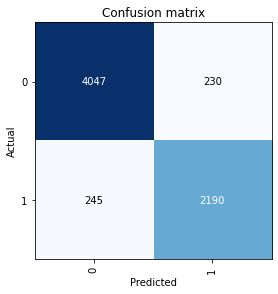

In [40]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='Confusion matrix')

# Cross validation with entire dataset

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc



In [11]:
test_preds = L()
roc_auc =[]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = skf.split(df_new.index, df_new['class'])
for x, y in res:
    ix = (L(list(x)), L(list(y)))
    to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)
    dls = to.dataloaders()
    learn = tabular_learner(dls, metrics=[accuracy, error_rate])
    learn.fit(5)
    preds,y_true,y_hat=learn.get_preds( with_decoded=True)
    
    # probs from log preds
    probs = np.exp(preds[:,1])
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, probs, pos_label=1)
    # Compute ROC area
    roc_auc_value = auc(fpr, tpr)
    # dl = learn.dls.test_dl(X_test)
    #_preds,_none ,_y=learn.get_preds(dl=dl, with_decoded=True)
    report = classification_report(y_true, y_hat, output_dict=True )
    test_preds.append(report)
    roc_auc.append(roc_auc_value)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.227649,0.212951,0.913886,0.086114,00:09
1,0.193928,0.197743,0.922676,0.077324,00:09
2,0.173828,0.187951,0.929678,0.070322,00:09
3,0.161690,0.197625,0.919547,0.080453,00:09
4,0.149521,0.185058,0.926400,0.073600,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.214857,0.210850,0.912545,0.087455,00:09
1,0.201579,0.202903,0.917461,0.082539,00:09
2,0.174965,0.184766,0.929082,0.070918,00:08
3,0.157580,0.196010,0.924315,0.075685,00:09
4,0.144191,0.182489,0.929827,0.070173,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.221115,0.213079,0.915375,0.084625,00:09
1,0.198572,0.196187,0.919994,0.080006,00:09
2,0.175895,0.203778,0.918504,0.081496,00:09
3,0.159192,0.186227,0.928188,0.071812,00:09
4,0.147595,0.199434,0.927294,0.072706,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.229403,0.215546,0.917312,0.082688,00:09
1,0.204027,0.202848,0.921931,0.078069,00:09
2,0.181722,0.190503,0.926549,0.073451,00:09
3,0.162576,0.185151,0.928188,0.071812,00:09
4,0.146492,0.184058,0.929082,0.070918,00:08


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.222375,0.217201,0.910757,0.089243,00:10
1,0.195977,0.201001,0.919696,0.080304,00:09
2,0.179451,0.198652,0.921484,0.078516,00:09
3,0.170154,0.178196,0.929678,0.070322,00:09
4,0.150044,0.177582,0.931317,0.068683,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.223066,0.221071,0.913290,0.086710,00:10
1,0.206617,0.201109,0.918504,0.081496,00:09
2,0.183944,0.211430,0.916865,0.083135,00:08
3,0.169436,0.183758,0.927741,0.072259,00:09
4,0.154639,0.185208,0.927145,0.072855,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.226526,0.211973,0.916269,0.083731,00:10
1,0.196870,0.200310,0.920590,0.079410,00:09
2,0.180042,0.190395,0.925507,0.074493,00:09
3,0.173193,0.182162,0.927294,0.072706,00:09
4,0.144491,0.181551,0.929082,0.070918,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.229149,0.219242,0.911502,0.088498,00:09
1,0.198815,0.208467,0.913439,0.086561,00:09
2,0.188303,0.189240,0.924166,0.075834,00:09
3,0.156603,0.183724,0.930274,0.069726,00:09
4,0.152765,0.187377,0.929827,0.070173,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.227774,0.221842,0.914035,0.085965,00:09
1,0.210642,0.197892,0.924762,0.075238,00:09
2,0.175309,0.185634,0.928635,0.071365,00:09
3,0.166967,0.198545,0.923272,0.076728,00:09
4,0.148030,0.189154,0.924315,0.075685,00:09


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.219974,0.216902,0.913737,0.086263,00:09
1,0.190007,0.201960,0.920441,0.079559,00:08
2,0.176040,0.195363,0.922527,0.077473,00:08
3,0.163035,0.187714,0.925060,0.074940,00:08
4,0.155417,0.187106,0.927145,0.072855,00:09


In [ ]:
#val_pct = L()
#test_pct = L()
test_preds = L()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = skf.split(train.index, train['class'])
for x, y in res:
    ix = (L(list(x)), L(list(y)))
    to = TabularPandas(df_new , cont_names  =reps_columns,
                   y_names='class', y_block = CategoryBlock,
                   splits=splits)
    dls = to.dataloaders()
    learn = tabular_learner(dls, metrics=[accuracy, error_rate])
    learn.fit(15)
    dl = learn.dls.test_dl(X_test)
    _preds,_none ,_y=learn.get_preds(dl=dl, with_decoded=True)
    report = classification_report(y_test, _y, output_dict=True )
    test_preds.append(report) # HERE

In [51]:
test_preds[0]

{'0': {'precision': 0.8260779863833299,
  'recall': 0.9236447520184544,
  'f1-score': 0.8721411457198867,
  'support': 4335},
 '1': {'precision': 0.9066027088036117,
  'recall': 0.7921597633136095,
  'f1-score': 0.8455263157894737,
  'support': 4056},
 'accuracy': 0.8600881897270886,
 'macro avg': {'precision': 0.8663403475934708,
  'recall': 0.857902257666032,
  'f1-score': 0.8588337307546802,
  'support': 8391},
 'weighted avg': {'precision': 0.8650016276819431,
  'recall': 0.8600881897270886,
  'f1-score': 0.8592762011128368,
  'support': 8391}}

In [54]:
recall=[]
precision=[]
f1=[]
accuracy=[]

In [55]:
 for predss in test_preds:
    precision.append(predss['macro avg']['precision'])
    recall.append(predss['macro avg']['recall'])
    f1.append(predss['macro avg']['f1-score'])
    accuracy.append(predss['accuracy'])

In [56]:
accuracy

[0.922377830750894,
 0.9275923718712753,
 0.9229737783075089,
 0.9219308700834327,
 0.9255065554231228,
 0.9238676996424314,
 0.9280393325387366,
 0.926549463647199,
 0.9225268176400476,
 0.9170143027413588]

5 epoch

In [58]:

print( np.mean(precision),  np.std(precision)*2)

print(np.mean(recall) ,  np.std(recall)*2)

print(np.mean(accuracy), np.std(accuracy)*2)

print( np.mean(f1) , np.std(f1)*2)

print( np.mean(roc_auc), np.std(roc_auc)*2)

0.916700624386951 0.006881035414551252
0.9191999324019072 0.0076102573596765356
0.9238379022646006 0.00621873488353811
0.9178852243191266 0.006752870334547247
0.9768363468415895 0.0


10 epoch

In [81]:
precision =  np.mean(precision) 
print(precision)
recall =  np.mean(recall) 
print(recall)
accuracy =  np.mean(accuracy) 
print(accuracy)
f1 =  np.mean(f1) 
print(f1)
roc_auc =  np.mean(roc_auc) 
print(roc_auc)

0.9284401519804266
0.9293388727060199
0.9336114421930869
0.9288300957227161
0.9811167551824649


In [82]:
roc_auc

0.9811167551824649

In [12]:
learn.export('TubularLearner.fastAI.bestmodel')